Hello...

use_gpu = 0

numpy int32 (4 bytes)
Unable to allocate 64.0 GiB for an array with shape (131072, 131072) and data type int32
Unable to allocate 36.0 GiB for an array with shape (98304, 98304) and data type int32
Unable to allocate 34.5 GiB for an array with shape (96256, 96256) and data type int32
Unable to allocate 34.1 GiB for an array with shape (95744, 95744) and data type int32
Unable to allocate 34.0 GiB for an array with shape (95488, 95488) and data type int32
Unable to allocate 33.9 GiB for an array with shape (95360, 95360) and data type int32
Unable to allocate 33.9 GiB for an array with shape (95328, 95328) and data type int32
Unable to allocate 33.8 GiB for an array with shape (95320, 95320) and data type int32
Unable to allocate 33.8 GiB for an array with shape (95316, 95316) and data type int32
Unable to allocate 33.8 GiB for an array with shape (95314, 95314) and data type int32
grid_count = 95_313, size_m = 36.3 Gb

numpy float64 (8 bytes)
Unable to allocate 1

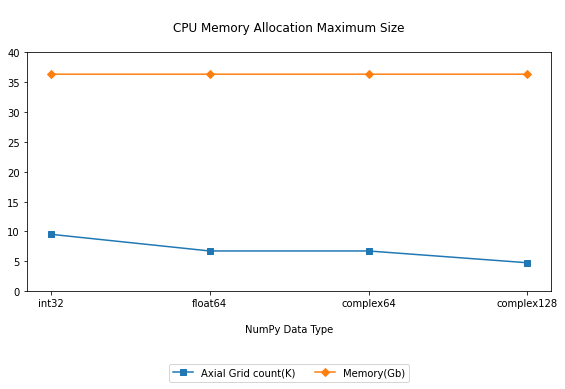

Done.
Wall time: 314 ms


In [19]:
%%time 

from IPython.display import clear_output
clear_output()

import numpy 
import cupy
from matplotlib import pyplot as plt

print( "Hello...\n" )

def test_array_memory( use_gpu , debug=0, verbose=0) : 
    
    if debug : 
        print( f"use_gpu = {use_gpu}" )
        print( flush=1 )

    np = cupy if use_gpu else numpy

    data_types = [ np.int_, np.double, np.csingle, np.cdouble ]
    #data_types = [ np.int_, ][::-1]
    
    dx = 0
    
    types = [ ]
    memories = [ ]
    grid_counts = [ ]
    
    for idx, data_type in enumerate( data_types ):
        array = np.array( 1, data_type )
        data_type_size = array.nbytes
        
        type_str = f"{data_type}".split( " " )[-1].split(".")[-1].split( "'")[0]
        
        types.append( type_str )
        
        type_str = [ "numpy ", "cupy "][use_gpu] + type_str
        type_str = f"{type_str } ({data_type_size} bytes)"
        
        debug and print( type_str, flush=1 )
                
        grid_count_succ = 2**8
        grid_count = 2**9
        grid_count_max = None
        
        memory_size = 0 
        
        while grid_count_max is None or abs( grid_count_max - grid_count_succ ) > 1 :
            array = None
            try : 
                if grid_count_max is None : 
                    grid_count = grid_count_succ*2
                else :
                    grid_count = (grid_count_max + grid_count_succ)//2
                pass
            
                if verbose : print( grid_count , end=", ", flush=1 )
            
                array = np.zeros( (grid_count, grid_count), data_type )                
                memory_size = array.nbytes 
                
                grid_count_succ = grid_count 
            except Exception as e:
                grid_count_max = grid_count
            
                if verbose : print()
                    
                if debug :                   
                    print( e, flush=1 )
            finally :
                del array
            pass
        pass
    
        if verbose : print()
            
        if debug:
            print( f"grid_count = {grid_count:_}, size_m = {memory_size/1e9:_.1f} Gb", flush=1 )
    
        grid_counts.append( grid_count ) 
        memories.append( memory_size )
        
        debug and print( ) 
    pass

    x = types 
    y1 = numpy.array( grid_counts )/1e4
    y2 = numpy.array( memories )/1e9
    
    ymax = ( max( numpy.max( y1 ), numpy.max( y2 ) )//10 + 1 )*10
    
    row_cnt = 1; col_cnt = 1
    fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 8*col_cnt, 6*row_cnt) )
    charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]
    chart_idx = 0
    chart = charts[ chart_idx ]
    chart_idx +=1 
    
    chart.plot( x, y1, marker="s", label="Axial Grid count(K)" ) 
    chart.plot( x, y2, marker="D", label="Memory(Gb)" ) 

    device = [ "CPU", "GPU" ][ use_gpu ]
    xlabel = [ "NumPy", "Cupy" ][ use_gpu ]
    chart.set_xticks( x )
    chart.set_title( f"\n{device} Memory Allocation Maximum Size\n" )
    chart.set_xlabel( f"\n{xlabel} Data Type" ) 
    chart.set_ylim( 0, ymax )
    chart.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2 ) 
    
    plt.tight_layout();
    plt.savefig( f"./result/memory_{use_gpu}.png" )
    plt.show(); 

    print( "Done." )
pass # -- test_array_memory

test_array_memory( use_gpu = 0, debug=1, verbose=0 )

use_gpu = 1

cupy int32 (4 bytes)
512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 
Out of memory allocating 17,179,869,184 bytes (allocated so far: 5,731,701,760 bytes).
49152, 
Out of memory allocating 9,663,676,416 bytes (allocated so far: 0 bytes).
40960, 
Out of memory allocating 6,710,886,400 bytes (allocated so far: 0 bytes).
36864, 38912, 
Out of memory allocating 6,056,574,976 bytes (allocated so far: 5,435,817,984 bytes).
37888, 
Out of memory allocating 5,742,002,176 bytes (allocated so far: 0 bytes).
37376, 37632, 37760, 37824, 37856, 
Out of memory allocating 5,732,306,944 bytes (allocated so far: 5,722,619,904 bytes).
37840, 37848, 37852, 37854, 37855, 
Out of memory allocating 5,732,004,352 bytes (allocated so far: 5,731,701,760 bytes).

grid_count = 37_855, size_m = 5.7 Gb

cupy float64 (8 bytes)
512, 1024, 2048, 4096, 8192, 16384, 32768, 
Out of memory allocating 8,589,934,592 bytes (allocated so far: 2,862,612,992 bytes).
24576, 28672, 
Out of memory allocating 6,576

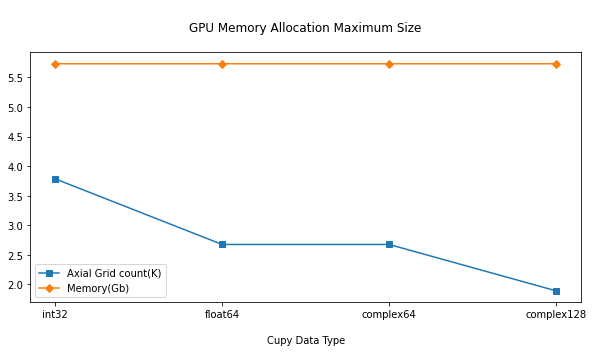

Done.


In [5]:
test_array_memory( use_gpu = 1, debug=1, verbose=0 )